## Import numpy, matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(seed=1)
plt.xkcd()

## Define the Logistic function

The standard logistic function has an easily calculated derivative:

$${\displaystyle f(x)={\frac {1}{1+e^{-x}}}={\frac {e^{x}}{1+e^{x}}}}$$

$${\displaystyle {\frac {d}{dx}}f(x)={\frac {e^{x}\cdot (1+e^{x})-e^{x}\cdot e^{x}}{(1+e^{x})^{2}}}}$$

$${\displaystyle {\frac {d}{dx}}f(x)={\frac {e^{x}}{(1+e^{x})^{2}}}=f(x)(1-f(x))}$$

The derivative of the logistic function has the property that:

$${\displaystyle {\frac {d}{dx}}f(x)={\frac {d}{dx}}f(-x).}$$


#### In Statistics and Machine Learning

Logistic functions are used in several roles in statistics. For example, they are the cumulative distribution function of the logistic family of distributions, and they are, a bit simplified, used to model the chance a chess player has to beat his opponent in the Elo rating system. More specific examples now follow.

#### Logistic regression

Logistic functions are used in logistic regression to model how the probability p of an event may be affected by one or more explanatory variables: an example would be to have the model


${\displaystyle p=f(a+bx)}$

where x is the explanatory variable and a and b are model parameters to be fitted and f is the standard logistic function.

Logistic regression and other log-linear models are also commonly used in machine learning. A generalisation of the logistic function to multiple inputs is the softmax activation function, used in multinomial logistic regression.

Another application of the logistic function is in the Rasch model, used in item response theory. In particular, the Rasch model forms a basis for maximum likelihood estimation of the locations of objects or persons on a continuum, based on collections of categorical data, for example the abilities of persons on a continuum based on responses that have been categorized as correct and incorrect.

#### Neural networks

Logistic functions are often used in neural networks to introduce nonlinearity in the model and/or to clamp signals to within a specified range. A popular neural net element computes a linear combination of its input signals, and applies a bounded logistic function to the result; this model can be seen as a "smoothed" variant of the classical threshold neuron.

A common choice for the activation or "squashing" functions, used to clip for large magnitudes to keep the response of the neural network bounded is


$${\displaystyle g(h)={\frac {1}{1+e^{-2\beta h}}}}$$

which is a logistic function. These relationships result in simplified implementations of artificial neural networks with artificial neurons. Practitioners caution that sigmoidal functions which are antisymmetric about the origin (e.g. the hyperbolic tangent) lead to faster convergence when training networks with backpropagation.

The logistic function is itself the derivative of another proposed activation function, the softplus.

Source: [Logistic Function](https://en.wikipedia.org/wiki/Logistic_function)

In [4]:
def logist(z):
    return 1 / (1 + np.exp(-z))

## Let's plot it

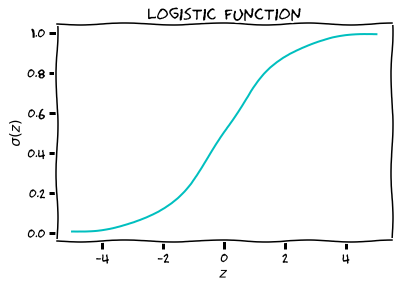

In [5]:
z = np.linspace(-5, 5)
plt.plot(z, logist(z), 'c-')
plt.xlabel('$z$')
plt.ylabel('$\sigma(z)$')
plt.title('Logistic Function')
plt.grid()
plt.show()

## Derivative of a Logistic Function

Derivative
The standard logistic function has an easily calculated derivative:

$${\displaystyle f(x)={\frac {1}{1+e^{-x}}}={\frac {e^{x}}{1+e^{x}}}}$$


$${\displaystyle {\frac {d}{dx}}f(x)={\frac {e^{x}\cdot (1+e^{x})-e^{x}\cdot e^{x}}{(1+e^{x})^{2}}}}$$


$${\displaystyle {\frac {d}{dx}}f(x)={\frac {e^{x}}{(1+e^{x})^{2}}}=f(x)(1-f(x))}$$

The derivative of the logistic function has the property that:


$${\displaystyle {\frac {d}{dx}}f(x)={\frac {d}{dx}}f(-x).}$$


In [7]:
#From calculation, it is expected that the local minimum occurs at x=9/4

cur_x = 6 # The algorithm starts at x=6
gamma = 0.01 # step size multiplier
precision = 0.00001
previous_step_size = cur_x

def df(x):
    return 4 * x**3 - 9 * x**2

while previous_step_size > precision:
    prev_x = cur_x
    cur_x += -gamma * df(prev_x)
    previous_step_size = abs(cur_x - prev_x)

print("The local minimum occurs at %f" % cur_x)

The local minimum occurs at 2.249965


In [9]:
def logist_derivative(z):
    return logist(z) * (1 - logist(z) )

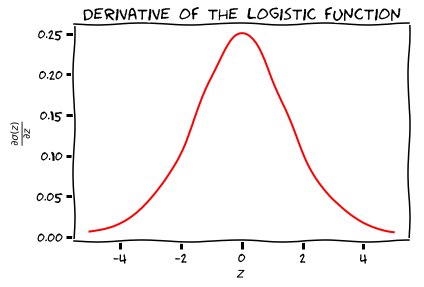

In [10]:
z = np.linspace(-5,5,100)
plt.plot(z, logist_derivative(z), 'r-')
plt.xlabel('$z$')
plt.ylabel('$\\frac{\\partial \\sigma(z)}{\\partial z}$')
plt.title('Derivative of the logistic function')
plt.grid()
plt.show()

### Cross-Entropy

The output of the model $y = \sigma(z)$ can be interpreted as a probability $y$ that input $z$ belongs to one class $(t=1)$, or probability $1-y$ that $z$ belongs to the other class $(t=0)$ in a two class classification problem. We note this down as: $P(t=1| z) = \sigma(z) = y$.
The neural network model will be optimized by maximizing the likelihood that a given set of parameters $\theta$ of the model can result in a prediction of the correct class of each input sample. The parameters $\theta$ transform each input sample $i$ into an input to the logistic function $z_{i}$. The likelihood maximization can be written as:
$$\underset{\theta}{\text{argmax}}\; \mathcal{L}(\theta|t,z) = \underset{\theta}{\text{argmax}} \prod_{i=1}^{n} \mathcal{L}(\theta|t_i,z_i)$$
The likelihood $\mathcal{L}(\theta|t,z)$ can be rewritten as the joint probability of generating $t$ and $z$ given the parameters $\theta$: $P(t,z|\theta)$. Since $P(A,B) = P(A|B)*P(B)$ this can be written as:
$$P(t,z|\theta) = P(t|z,\theta)P(z|\theta)$$
Since we are not interested in the probability of $z$ we can reduce this to: $\mathcal{L}(\theta|t,z) = P(t|z,\theta) = \prod_{i=1}^{n} P(t_i|z_i,\theta)$. Since $t_i$ is a Bernoulli variable, and the probability $P(t| z) = y$ is fixed for a given $\theta$ we can rewrite this as:
$$\begin{split}
P(t|z)  = \prod_{i=1}^{n} P(t_i=1|z_i)^{t_i} * (1 - P(t_i=1|z_i))^{1-t_i} \\
 = \prod_{i=1}^{n} y_i^{t_i} * (1 - y_i)^{1-t_i} \end{split}$$
Since the logarithmic function is a monotone increasing function we can optimize the log-likelihood function $\underset{\theta}{\text{argmax}}\; log \mathcal{L}(\theta|t,z)$. This maximum will be the same as the maximum from the regular likelihood function. The log-likelihood function can be written as:
$$\begin{split} log \mathcal{L}(\theta|t,z)  = log \prod_{i=1}^{n} y_i^{t_i} * (1 - y_i)^{1-t_i} \\
 = \sum_{i=1}^{n} t_i log(y_i) + (1-t_i) log(1 - y_i)
\end{split}$$
Minimizing the negative of this function (minimizing the negative log likelihood) corresponds to maximizing the likelihood. This error function $\xi(t,y)$ is typically known as the cross-entropy error function (also known as log-loss):
$$\begin{split}
\xi(t,y)  = - log \mathcal{L}(\theta|t,z) \\
 = - \sum_{i=1}^{n} \left[ t_i log(y_i) + (1-t_i)log(1-y_i) \right] \\
 = - \sum_{i=1}^{n} \left[ t_i log(\sigma(z) + (1-t_i)log(1-\sigma(z)) \right]
\end{split}$$
This function looks complicated but besides the previous derivation there are a couple of intuitions why this function is used as a cost function for logistic regression. First of all it can be rewritten as:
$$ \xi(t_i,y_i) = 
   \begin{cases}
   -log(y_i)  \text{if } t_i = 1 \\
   -log(1-y_i)  \text{if } t_i = 0
  \end{cases}$$

Which in the case of $t_i=1$ is $0$ if $y_i=1$ $(-log(1)=0)$ and goes to infinity as $y_i \rightarrow 0$ $(\underset{y \rightarrow 0}{\text{lim}}  -log(y) = +\infty)$. The reverse effect is happening if $t_i=0$.

So what we end up with is a cost function that is $0$ if the probability to predict the correct class is $1$ and goes to infinity as the probability to predict the correct class goes to $0$.

Notice that the cost function $\xi(t,y)$ is equal to the negative log probability that $z$ is classified as its correct class:
$-log(P(t=1| z)) = -log(y)$,
$-log(P(t=0| z)) = -log(1-y)$.

By minimizing the negative log probability, we will maximize the log probability. And since $t$ can only be $0$ or $1$, we can write $\xi(t,y)$ as: $$ \xi(t,y) = -t * log(y) - (1-t) * log(1-y) $$

Which will give $\xi(t,y) = - \sum_{i=1}^{n} \left[ t_i log(y_i) + (1-t_i)log(1-y_i) \right]$ if we sum over all $n$ samples.

Another reason to use the cross-entropy function is that in simple logistic regression this results in a convex cost function, of which the global minimum will be easy to find. Note that this is not necessarily the case anymore in multilayer neural networks.

#### Derivative of the cross-entropy cost function for the logistic function

The derivative ${\partial \xi}/{\partial y}$ of the cost function with respect to its input can be calculated as:

$$\begin{split}
\frac{\partial \xi}{\partial y}  = \frac{\partial (-t * log(y) - (1-t)* log(1-y))}{\partial y} = \frac{\partial (-t * log(y))}{\partial y} +  \frac{\partial (- (1-t)*log(1-y))}{\partial y} \\
 = -\frac{t}{y} + \frac{1-t}{1-y} = \frac{y-t}{y(1-y)}
\end{split}$$

This derivative will give a nice formula if it is used to calculate the derivative of the cost function with respect to the inputs of the classifier ${\partial \xi}/{\partial z}$ since the derivative of the logistic function is ${\partial y}/{\partial z} =  y (1-y)$:

$$\frac{\partial \xi}{\partial z} = \frac{\partial y}{\partial z} \frac{\partial \xi}{\partial y} = y (1-y) \frac{y-t}{y(1-y)} = y-t $$

## Softmax Function

The logistic output function described in the previous intermezzo can only be used for the classification between two target classes $t=1$ and $t=0$. This logistic function can be generalized to output a multiclass categorical probability distribution by the softmax function. This softmax function $\varsigma$ takes as input a $C$-dimensional vector $\mathbf{z}$ and outputs a $C$-dimensional vector $\mathbf{y}$ of real values between $0$ and $1$. This function is a normalized exponential and is defined as:

$$ y_c = \varsigma(\mathbf{z})_c = \frac{e^{z_c}}{\sum_{d=1}^C e^{z_d}} \quad \text{for} \; c = 1 \cdots C$$

The denominator $\sum_{d=1}^C e^{z_d}$ acts as a regularizer to make sure that $\sum_{c=1}^C y_c = 1$. 

As the output layer of a neural network, the softmax function can be represented graphically as a layer with $C$ neurons.

We can write the probabilities that the class is $t=c$ for $c = 1 \ldots C$ given input $\mathbf{z}$ as:

$$ 
\begin{bmatrix} 
P(t=1 | \mathbf{z}) \\
\vdots \\
P(t=C | \mathbf{z}) \\
\end{bmatrix}
= 
\begin{bmatrix} 
\varsigma(\mathbf{z})_1 \\
\vdots \\
\varsigma(\mathbf{z})_C \\
\end{bmatrix}
= \frac{1}{\sum_{d=1}^C e^{z_d}}
\begin{bmatrix} 
e^{z_1} \\
\vdots \\
e^{z_C} \\
\end{bmatrix}
$$

Where $P(t=c | \mathbf{z})$ is thus the probability that that the class is $c$ given the input $\mathbf{z}$.

These probabilities of the output $P(t=1|\mathbf{z})$ for an example system with 2 classes ($t=1$, $t=2$) and input $\mathbf{z} = [z_1, z_2]$ is shown in the figure below. The other probability $P(t=2|\mathbf{z})$ will be complementary.

In [11]:
from matplotlib.colors import colorConverter, ListedColormap
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

#### Define Softmax function


In [12]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

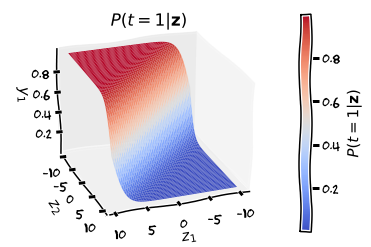

In [13]:
# Plot the softmax output for 2 dimensions for both classes
# Plot the output in function of the weights
# Define a vector of weights for which we want to plot the ooutput
nb_of_zs = 200
zs = np.linspace(-10, 10, num=nb_of_zs) # input 
zs_1, zs_2 = np.meshgrid(zs, zs) # generate grid
y = np.zeros((nb_of_zs, nb_of_zs, 2)) # initialize output
# Fill the output matrix for each combination of input z's
for i in range(nb_of_zs):
    for j in range(nb_of_zs):
        y[i,j,:] = softmax(np.asarray([zs_1[i,j], zs_2[i,j]]))
# Plot the cost function surfaces for both classes
fig = plt.figure()
# Plot the cost function surface for t=1
ax = fig.gca(projection='3d')
surf = ax.plot_surface(zs_1, zs_2, y[:,:,0], linewidth=0, cmap=cm.coolwarm)
ax.view_init(elev=30, azim=70)
cbar = fig.colorbar(surf)
ax.set_xlabel('$z_1$', fontsize=15)
ax.set_ylabel('$z_2$', fontsize=15)
ax.set_zlabel('$y_1$', fontsize=15)
ax.set_title ('$P(t=1|\mathbf{z})$')
cbar.ax.set_ylabel('$P(t=1|\mathbf{z})$', fontsize=15)
plt.grid()
plt.show()

### Derivative of the softmax function
To use the softmax function in neural networks, we need to compute its derivative. If we define $\Sigma_C = \sum_{d=1}^C e^{z_d} \, \text{for} \; c = 1 \cdots C$ so that $y_c = e^{z_c} / \Sigma_C$, then this derivative ${\partial y_i}/{\partial z_j}$ of the output $\mathbf{y}$ of the softmax function with respect to its input $\mathbf{z}$ can be calculated as:

$$
\begin{split}
\text{if} \; i = j :\frac{\partial y_i}{\partial z_i} = \frac{\partial \frac{e^{z_i}}{\Sigma_C}}{\partial z_i} = \frac{e^{z_i}\Sigma_C - e^{z_i}e^{z_i}}{\Sigma_C^2} = \frac{e^{z_i}}{\Sigma_C}\frac{\Sigma_C - e^{z_i}}{\Sigma_C} = \frac{e^{z_i}}{\Sigma_C}(1-\frac{e^{z_i}}{\Sigma_C}) =  y_i (1 - y_i)\\
\text{if} \; i \neq j : \frac{\partial y_i}{\partial z_j} = \frac{\partial \frac{e^{z_i}}{\Sigma_C}}{\partial z_j} = \frac{0 - e^{z_i}e^{z_j}}{\Sigma_C^2} = -\frac{e^{z_i}}{\Sigma_C} \frac{e^{z_j}}{\Sigma_C} = -y_i y_j
\end{split}$$

Note that if $i = j$ this derivative is similar to the derivative of the logistic function.

### Cross-entropy cost function for the softmax function
To derive the cost function for the softmax function we start out from the likelihood function that a given set of parameters $\theta$ of the model can result in prediction of the correct class of each input sample, as in the derivation for the logistic cost function. The maximization of this likelihood can be written as:
$$\underset{\theta}{\text{argmax}}\; \mathcal{L}(\theta|\mathbf{t},\mathbf{z})$$

The likelihood $\mathcal{L}(\theta|\mathbf{t},\mathbf{z})$ can be rewritten as the joint probability of generating $\mathbf{t}$ and $\mathbf{z}$ given the parameters $\theta$: $P(\mathbf{t},\mathbf{z}|\theta)$. Which can be written as a conditional distribution:

$$P(\mathbf{t},\mathbf{z}|\theta) = P(\mathbf{t}|\mathbf{z},\theta)P(\mathbf{z}|\theta)$$

Since we are not interested in the probability of $\mathbf{z}$ we can reduce this to: $\mathcal{L}(\theta|\mathbf{t},\mathbf{z}) = P(\mathbf{t}|\mathbf{z},\theta)$. Which can be written as $P(\mathbf{t}|\mathbf{z})$ for fixed $\theta$. Since each $t_i$ is dependent on the full $\mathbf{z}$, and only 1 class can be activated in the $\mathbf{t}$ we can write

$$P(\mathbf{t}|\mathbf{z}) = \prod_{i=c}^{C} P(t_c|\mathbf{z})^{t_c} = \prod_{i=c}^{C} \varsigma(\mathbf{z})_c^{t_c} = \prod_{i=c}^{C} y_c^{t_c}$$

As was noted during the derivation of the cost function of the logistic function, maximizing this likelihood can also be done by minimizing the negative log-likelihood:

$$- log \mathcal{L}(\theta|\mathbf{t},\mathbf{z}) = \xi(\mathbf{t},\mathbf{z}) = - log \prod_{i=c}^{C} y_c^{t_c} = - \sum_{i=c}^{C} t_c \cdot log(y_c)$$

Which is the cross-entropy error function $\xi$. Note that for a 2 class system output $t_2 = 1 - t_1$ and this results in the same error function as for logistic regression: $\xi(\mathbf{t},\mathbf{y}) =- t_c log(y_c) - (1-t_c) log(1-y_c) $.

The cross-entropy error function over a batch of multiple samples of size $n$ can be calculated as:

$$\xi(T,Y) = \sum_{i=1}^n \xi(\mathbf{t}_i,\mathbf{y}_i) = - \sum_{i=1}^n \sum_{i=c}^{C} t_{ic} \cdot log( y_{ic}) $$

Where $t_{ic}$ is 1 if and only if sample $i$ belongs to class $c$, and $y_{ic}$ is the output probability that sample $i$ belongs to class $c$.

#### Derivative of the cross-entropy cost function for the softmax function

The derivative ${\partial \xi}/{\partial z_i}$ of the cost function with respect to the softmax input $z_i$ can be calculated as:

$$\begin{split}
\frac{\partial \xi}{\partial z_i} = - \sum_{j=1}^C \frac{\partial t_j log(y_j)}{\partial z_i}{} =
- \sum_{j=1}^C t_j \frac{\partial log(y_j)}{\partial z_i} = - \sum_{j=1}^C t_j \frac{1}{y_j} \frac{\partial y_j}{\partial z_i} \\
 = - \frac{t_i}{y_i} \frac{\partial y_i}{\partial z_i} - \sum_{j \neq i}^C \frac{t_j}{y_j} \frac{\partial y_j}{\partial z_i}
= - \frac{t_i}{y_i} y_i (1-y_i) - \sum_{j \neq i}^C \frac{t_j}{y_j} (-y_j y_i) \\
 = - t_i + t_i y_i + \sum_{j \neq i}^C t_j y_i = - t_i + \sum_{j = 1}^C t_j y_i
= -t_i + y_i \sum_{j = 1}^C t_j \\
 = y_i - t_i
\end{split}$$


Note that we already derived ${\partial y_j}/{\partial z_i}$ for $i=j$ and $i \neq j$ above.

The result that ${\partial \xi}/{\partial z_i} = y_i - t_i$ for all $i \in C$ is the same as the derivative of the cross-entropy for the logistic function which had only one output node. 